## HARSH SHARMA

### XGBoost Model on classifying news based on text

---

### Context to the problem
Since we have already run the random forest model, let's run the a more advance model that is a XGBoost model/algorithm which hopefully will give us the better accuracy than before.

---

In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
#  Importing everything we need 
# The usual packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Splitting data
from sklearn.model_selection import train_test_split 

# Scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

# Classifiers 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
# import xgboost
from xgboost import XGBClassifier


import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [6]:
# mounting google drive
import os
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [7]:
# reading the data(csv) file
path = '/content/drive/MyDrive/news data/'
main_df = pd.read_csv(path+'file_name.csv')

In [8]:
# peeking in to the dataset
main_df.head()

,Unnamed: 0,category,headline
0,0,WORLD NEWS,Over Million Americans Roll Up Sleeves For Om...
1,1,WORLD NEWS,American Airlines Flyer Charged Banned For Li...
2,2,COMEDY,Of The Funniest Tweets About Cats And Dogs Th...
3,3,PARENTING,The Funniest Tweets From Parents This Week Se...
4,4,WORLD NEWS,Woman Who Called Cops On Black Bird Watcher Lo...


In [9]:
# dropping unwanted columns
main_df.drop(columns='Unnamed: 0', inplace=True)

In [10]:
# checking null values
main_df.isna().sum() 

category     0
headline    29
dtype: int64

In [11]:
# dropping null values
main_df.dropna(inplace=True)

In [12]:
def PlotBoundaries(model, X, Y, figsize=(8, 6)):
    '''
    Helper function that plots the decision boundaries of a model and data (X,Y)
    code modified from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    '''

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, alpha=0.4)

    # Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
    plt.show()

In [13]:
def PlotEnsembleBoundaries(ensembles, X, Y, shape, figsize=(10, 7)):
    '''
    Helper function to plot the boundaries of ensemble methods.
    code modified from: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html
    '''
    fig, axes = plt.subplots(shape[0], shape[1], figsize=figsize)
    for i, (ax, model) in enumerate(zip(axes.ravel(), ensembles)):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.4)

        # Plot
        ax.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor='k')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [14]:
# making all alphabets lower
main_df['headline'] = main_df['headline'].str.lower()

In [64]:
# defining dependent and independent variables
X = main_df[['headline']]
y = main_df['category']

In [65]:
from sklearn.preprocessing import LabelEncoder

# applying label encoding to the target variable
encoder = LabelEncoder()
le = encoder.fit(y)

In [66]:
y

0             WORLD NEWS
1             WORLD NEWS
2                 COMEDY
3              PARENTING
4             WORLD NEWS
               ...      
209318    SCIENCE & TECH
209319            SPORTS
209320            SPORTS
209321            SPORTS
209322            SPORTS
Name: category, Length: 209294, dtype: object

In [67]:
# transforming y according label encoder
y = le.transform(y)

In [71]:
# check
y.size

209294

In [ ]:
#splitting into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [ ]:
# making a pipeline for the tf-idf vectorizer
pipeline = Pipeline([
              
                ('tfidf', TfidfVectorizer( min_df =3, max_df=0.2, max_features=3000, 
                    strip_accents='unicode', analyzer='word',
                    ngram_range=(1, 10),
                    stop_words = 'english'))
])

In [ ]:
# fitting the pipeline to the headline column
pipeline.fit(X_train['headline'])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.2, max_features=3000, min_df=3,
                                 ngram_range=(1, 10), stop_words='english',
                                 strip_accents='unicode'))])

In [ ]:
%%time
train_vec = pipeline.transform(X_train['headline'])
test_vec = pipeline.transform(X_test['headline'])

CPU times: user 5.55 s, sys: 14 ms, total: 5.57 s
Wall time: 5.55 s


In [ ]:
# fitting the model on XGboost and AdaBoost Classifier
XGB_model = XGBClassifier()
AB_model = AdaBoostClassifier()

XGB_model.fit(train_vec, y_train)
AB_model.fit(train_vec, y_train)

print("Test Set Scores:")
print(f"AdaBoost score: {AB_model.score(test_vec, y_test)}")
print(f"XG Boost score: {XGB_model.score(test_vec, y_test)}")

Test Set Scores:
AdaBoost score: 0.27618911106333166
XG Boost score: 0.47399603430564513


In [ ]:
# scoring on train set
print("Train Set Scores:")
print(f"AdaBoost score: {AB_model.score(train_vec, y_train)}")
print(f"XG Boost score: {XGB_model.score(train_vec, y_train)}")

Train Set Scores:
AdaBoost score: 0.2762922925314301
XG Boost score: 0.49015438827007496


AdaBoost performs very poorly on our model

#### Running a XGboost model with some basic parameters

From above we can see that XGboost accuracies are better than the 5-fold cross validation basic decision tree model

In [ ]:
# XGBoost classification with some basic parameters
my_xgb = XGBClassifier()

param_grid = {'n_estimators': [100, 110, 120], 'max_depth': [7, 8]}
grid_xgb = GridSearchCV(my_xgb, param_grid=param_grid, verbose=1, n_jobs=-1)

grid_xgb.fit(train_vec, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7, 8], 'n_estimators': [100, 110, 120]},
             verbose=1)

In [ ]:
# accuracy on the test set
print(f"XG Boost score: {grid_xgb.score(test_vec, y_test)}")

XG Boost score: 0.5478869538211615


In [ ]:
# accuracy on the train set
print(f"XG Boost score: {grid_xgb.score(train_vec, y_train)}")

XG Boost score: 0.5938065517962194


By doing some hyperparameter tuning we have improved the accuracy by a big margin but we did not really try all the paramteres and hypermeteres which could have given much better results.

GridSearchCV took almost 2 hours to run this small pipeline. So for further tuning let's try to run randomgridsearch to get faster results. But it should be noted that randomsearchCv gives low performance than the gridsearchGV. There are still more methods to make models more efficient in terms of speed which are discussed and done below. 

And probably the number of trees in the forest are huge and for sure due to that reason it's taking too much time to run.

In [ ]:
grid_xgb.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
# we cast max_depth to str so that seaborn treats it like a category,
# which is better for visuals
results_df = pd.DataFrame({
    "n_estimators": grid_xgb.cv_results_["param_n_estimators"],
    'max_depth': grid_xgb.cv_results_["param_max_depth"].astype(str),
    'mean_score': grid_xgb.cv_results_["mean_test_score"]
})

results_df.head()

,n_estimators,max_depth,mean_score
0,100,7,0.535545
1,110,7,0.538782
2,120,7,0.541273
3,100,8,0.539887
4,110,8,0.542873


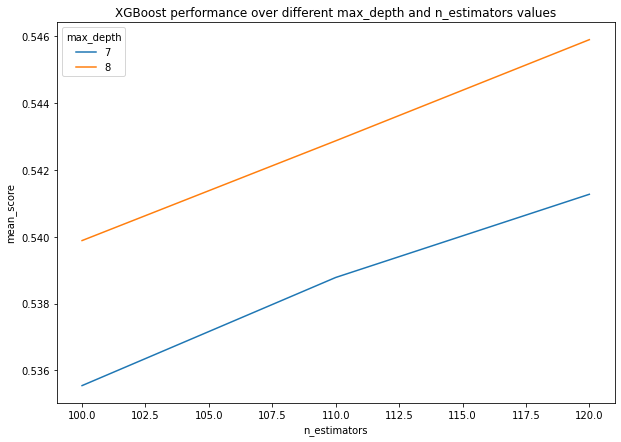

In [ ]:
# plotting accuracy versus number of parameters
plt.figure(figsize=(10, 7))
sns.lineplot(x="n_estimators", y="mean_score", hue="max_depth", data=results_df)
plt.title("XGBoost performance over different max_depth and n_estimators values")
plt.show()

From the above graph it is obvious that more is the depth of the tree, more is the good is the precision of the model.


However, also more is the `max_depth`, more are the chances of overfitting of the model.

In [ ]:
grid_xgb.best_estimator_

XGBClassifier(max_depth=8, n_estimators=120, objective='multi:softprob')

---

#### Hyperparameter tuning on XGboost model

As XGBoost is computational expensive model, let's take a sample dataset out of the datasset and do the hyperparameter tuning on the sub-data.

In [ ]:
# takeing 60% sample from the dataset
main2_df = main_df.sample(frac=0.35, random_state=1)

In [ ]:
# defining dependent and independent variable
X = main2_df[['headline']]
y = main2_df['category']

In [ ]:
 #splitting into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [ ]:
# making a pipeline for the tf-idf vectorizer
pipeline = Pipeline([
              
                ('tfidf', TfidfVectorizer( min_df =3, max_df=0.2, max_features=3000, 
                    strip_accents='unicode', analyzer='word',
                    ngram_range=(1, 10),
                    stop_words = 'english'))
])

In [ ]:
# fitting the pipeline to the headline column
pipeline.fit(X_train['headline'])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.2, max_features=3000, min_df=3,
                                 ngram_range=(1, 10), stop_words='english',
                                 strip_accents='unicode'))])

In [ ]:
%%time
train_vec = pipeline.transform(X_train['headline'])
test_vec = pipeline.transform(X_test['headline'])

CPU times: user 1.85 s, sys: 7.9 ms, total: 1.86 s
Wall time: 1.85 s


In [ ]:
# experiment
my_xgb = XGBClassifier()

param_grid = {'n_estimators': [40, 45], 'max_depth': [15, 20]}
grid_xgb = RandomizedSearchCV(my_xgb, param_distributions=param_grid, verbose=1, n_jobs=-1)

grid_xgb.fit(train_vec, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [15, 20],
                                        'n_estimators': [40, 45]},
                   verbose=1)

In [ ]:
# accuracy on the train set
print(f"XG Boost score: {grid_xgb.score(train_vec, y_train)}")

XG Boost score: 0.6340909866557456


In [ ]:
# accuracy on the test set
print(f"XG Boost score: {grid_xgb.score(test_vec, y_test)}")

XG Boost score: 0.5199645075421473


From above we can see that there is a lot of overfitting in the data. This could be because there is a bigger value of `max_depth` being used in the above model.

In [ ]:
grid_xgb.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
# we cast max_depth to str so that seaborn treats it like a category,
# which is better for visuals
results_df = pd.DataFrame({
    "n_estimators": grid_xgb.cv_results_["param_n_estimators"],
    'max_depth': grid_xgb.cv_results_["param_max_depth"].astype(str),
    'mean_score': grid_xgb.cv_results_["mean_test_score"]
})

results_df.head()

,n_estimators,max_depth,mean_score
0,40,15,0.513037
1,45,15,0.515494
2,40,20,0.517508
3,45,20,0.519607


From the above table, we can see that more are the number of trees in the dataset, more is the performance of the XGboost model.

In [ ]:
grid_xgb.best_estimator_

XGBClassifier(max_depth=20, n_estimators=45, objective='multi:softprob')

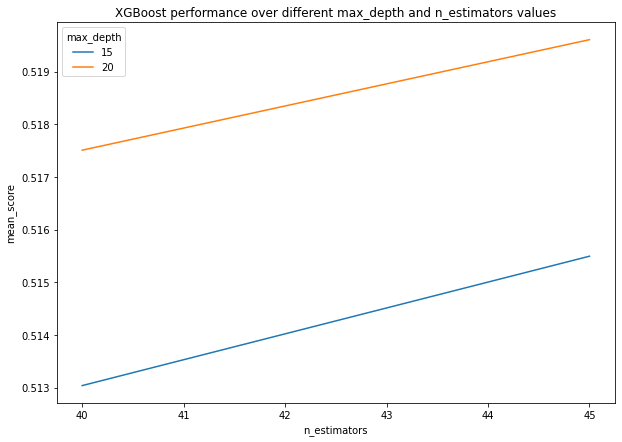

In [ ]:
# plotting avearge accuracies versus number of trees
plt.figure(figsize=(10, 7))
sns.lineplot(x="n_estimators", y="mean_score", hue="max_depth", data=results_df)
plt.title("XGBoost performance over different max_depth and n_estimators values")
plt.show()

---

### Final hyperparameter tuning

In [15]:
# defining dependent and dependent variable
X = main_df[['headline']]
y = main_df['category']

In [16]:
 #splitting into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [17]:
# making a pipeline for the tf-idf vectorizer
pipeline = Pipeline([
              
                ('tfidf', TfidfVectorizer( min_df =3, max_df=0.2, max_features=3000, 
                    strip_accents='unicode', analyzer='word',
                    ngram_range=(1, 10),
                    stop_words = 'english'))
])

In [18]:
# fitting the pipeline to the headline column
pipeline.fit(X_train['headline'])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.2, max_features=3000, min_df=3,
                                 ngram_range=(1, 10), stop_words='english',
                                 strip_accents='unicode'))])

In [19]:
%%time
train_vec = pipeline.transform(X_train['headline'])
test_vec = pipeline.transform(X_test['headline'])

CPU times: user 5.52 s, sys: 2.96 ms, total: 5.52 s
Wall time: 5.51 s


In [ ]:
# final tuning
my_xgb = XGBClassifier()

param_grid = {'n_estimators': [25, 30], 'max_depth': [10, 15],
              'gamma': [2], 'min_child_weight': [5, 6] }
grid_xgb = RandomizedSearchCV(my_xgb, param_distributions=param_grid, cv=3, verbose=1, n_jobs=-1)

grid_xgb.fit(train_vec, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'gamma': [2], 'max_depth': [10, 15],
                                        'min_child_weight': [5, 6],
                                        'n_estimators': [25, 30]},
                   verbose=1)

In [ ]:
# accuracy on the train set
print(f"XG Boost score: {grid_xgb.score(train_vec, y_train)}")

XG Boost score: 0.5463373846567324


In [ ]:
# accuracy on the test set
print(f"XG Boost score: {grid_xgb.score(test_vec, y_test)}")

XG Boost score: 0.5231133089658138


In [ ]:
# we cast max_depth to str so that seaborn treats it like a category,
# which is better for visuals
results_df = pd.DataFrame({
    "n_estimators": grid_xgb.cv_results_["param_n_estimators"],
    'max_depth': grid_xgb.cv_results_["param_max_depth"].astype(str),
    'mean_score': grid_xgb.cv_results_["mean_test_score"],
    'gamma': grid_xgb.cv_results_["param_gamma"],
    'min_child_weight': grid_xgb.cv_results_["param_min_child_weight"]
})

results_df.head()

,n_estimators,max_depth,mean_score,gamma,min_child_weight
0,25,10,0.494891,2,5
1,30,10,0.499824,2,5
2,25,10,0.491719,2,6
3,30,10,0.497674,2,6
4,25,15,0.513017,2,5


By using the above parameters we fixed the overfitting problem as the differnce between train and test set accuracy is small, but descresed the performance of the overall model.

---

### Adding complexity in terms of hyperparameters

In [20]:
# final tuning
my_xgb = XGBClassifier()

param_grid = {'n_estimators': [45, 50], 'max_depth': [20, 25, 26],
              'gamma': [2], 'min_child_weight': [5, 6] }
grid_xgb = RandomizedSearchCV(my_xgb, param_distributions=param_grid, cv=3, verbose=1, n_jobs=-1,refit=True)

grid_xgb.fit(train_vec, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'gamma': [2], 'max_depth': [20, 25, 26],
                                        'min_child_weight': [5, 6],
                                        'n_estimators': [45, 50]},
                   verbose=1)

In [ ]:
model = grid_xgb.best_estimator_

In [10]:
model=XGBClassifier(
    max_depth = 20, n_estimators =45 
)

In [11]:
import joblib
import pickle

In [13]:
joblib.dump(model , 'C:/Users/user/Desktop/model_jlib.pkl')

['C:/Users/user/Desktop/model_jlib.pkl']

Took 90 mins to run!!!

In [21]:
print(f"XG Boost score: {grid_xgb.score(train_vec, y_train)}")

XG Boost score: 0.5920148117179801


In [22]:
print(f"XG Boost score: {grid_xgb.score(test_vec, y_test)}")

XG Boost score: 0.5518526481760195


In [23]:
# we cast max_depth to str so that seaborn treats it like a category,
# which is better for visuals
results_df = pd.DataFrame({
    "n_estimators": grid_xgb.cv_results_["param_n_estimators"],
    'max_depth': grid_xgb.cv_results_["param_max_depth"].astype(str),
    'mean_score': grid_xgb.cv_results_["mean_test_score"],
    'gamma': grid_xgb.cv_results_["param_gamma"],
    'min_child_weight': grid_xgb.cv_results_["param_min_child_weight"]
})

results_df.head()


,n_estimators,max_depth,mean_score,gamma,min_child_weight
0,45,26,0.546415,2,5
1,50,26,0.546767,2,6
2,50,25,0.547711,2,5
3,50,25,0.545907,2,6
4,45,26,0.544140,2,6


Improved the accuracy by 3%!! and overfitting is also not there. 

Accuracy can be improved by putting more hyperparameters and values but more GPU power is needed.

In [25]:
# Get class predictions
y_pred = grid_xgb.predict(test_vec)

In [46]:
# Precision 
from sklearn.metrics import precision_score

# precision_score(true labels, predicted labels)
precision_score(y_test, y_pred, average='macro')

0.5463148587935722

In [47]:
# Recall
from sklearn.metrics import recall_score

# recall_score(true labels, predicted labels)
recall_score(y_test, y_pred, average='macro')

0.4415977900957081

In [48]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

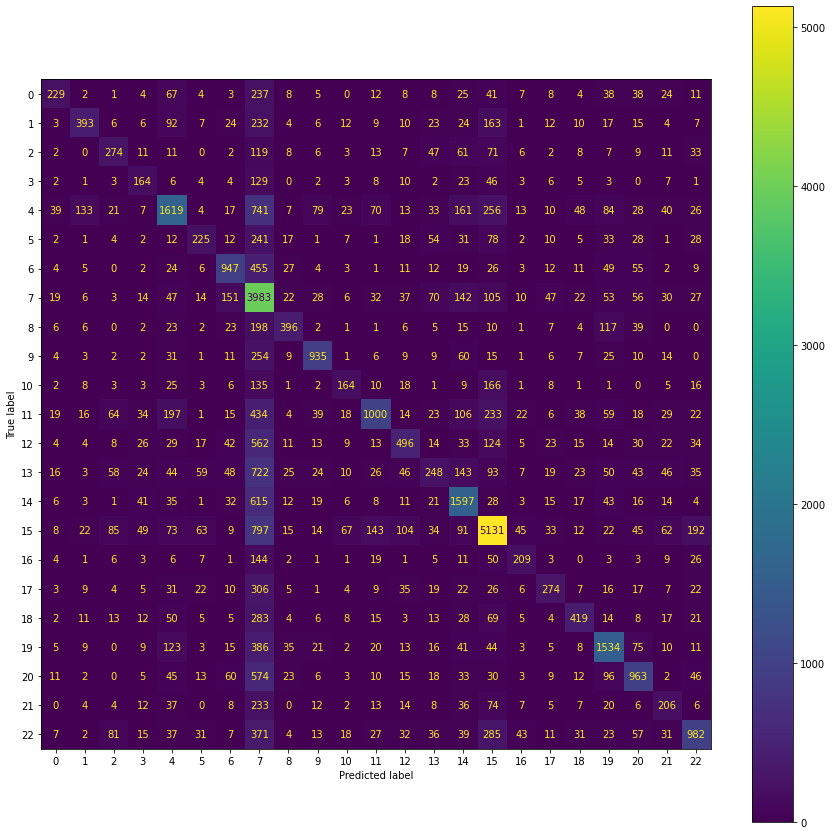

In [49]:
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax)

__FOOD & DRINK__ and __POLITICS__ have the most number of true positives, 

But it's very hard to know about true negatives, false positives and false negatives.


So let's have a look at the classification report.

In [50]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.29      0.39       784
           1       0.61      0.36      0.46      1080
           2       0.43      0.39      0.41       711
           3       0.36      0.38      0.37       432
           4       0.61      0.47      0.53      3472
           5       0.46      0.28      0.34       813
           6       0.65      0.56      0.60      1687
           7       0.33      0.81      0.47      4924
           8       0.62      0.46      0.53       864
           9       0.75      0.66      0.70      1415
          10       0.44      0.28      0.34       588
          11       0.68      0.41      0.52      2411
          12       0.53      0.32      0.40      1548
          13       0.34      0.14      0.20      1812
          14       0.58      0.63      0.60      2548
          15       0.72      0.72      0.72      7116
          16       0.51      0.41      0.45       515
          17       0.51    

It's very hard to know which class is which one and so on


Let's find which class is assigned to what integer.

In [54]:
# checking the order of classes
print(encoder.classes_)

['ARTS & CULTURE' 'COMEDY' 'CRIME' 'EDUCATION' 'ENTERTAINMENT'
 'ENVIRONMENT' 'FOOD & DRINK' 'HEALTHY LIVING' 'HOME & LIVING'
 'MARRIAGE & DIVORCE' 'MEDIA' 'MINORITIES' 'MONEY & BUSINESS' 'OTHER NEWS'
 'PARENTING' 'POLITICS' 'RELIGION' 'SCIENCE & TECH' 'SPORTS'
 'STYLE & BEAUTY' 'TRAVEL' 'WOMEN' 'WORLD NEWS']


__Interpretations__
1. __Healthy living__ has 81% recall and 33% precision
2. __POLITICS__ has same recall and accuracy, that is 72%

Note: Feature engineering can be done by adding short description column, but I decided to use more complex model which is neural networks.


Also, the distribution of classes is somewhat imbalanced in the dataset, which means accuracy could have been improved with upsampling or downsampling of the classes.

---

| Models | Accuracy | Precision | Recall
| --- | --- | --- | --- |
| XG model | 47% | --- | --- |
| XGBoost model with some basic params | 54% | --- | --- |
| Experiment (subset of the data) with params | 51% | --- | --- |
| XGboost hyperparameter tuning | 52% |  --- | --- |
| Final hyperparameter tuning | 55% |  54% | 44% |

For this project, I decided to deal with accuracy only.

---

### Thank You!!